In [74]:
%matplotlib inline

import numpy as np
from matplotlib.patches import Ellipse
from scipy.constants import c
from scipy.constants import pi
from scipy.optimize import minimize
from scipy.stats import chi2
from matplotlib import pyplot as plt

f = 2.4e9
np.random.seed(100)

Functions

In [75]:
def get_transmission_power(Pt, r): 
    Pr = Pt + 20 * np.log10(c / (4 * pi * f * r)) 
    return Pr

def get_transmission_power_coords(Pt, router_pos, wifi_pos):
    r = ((router_pos[0] - wifi_pos[0]) ** 2 + (router_pos[1] - wifi_pos[1]) ** 2 + (router_pos[2] - wifi_pos[2]) ** 2) ** 0.5 
    return get_transmission_power(Pt, r)

def get_distance(Pt, Pr):
    r = c / (10 ** ((Pr - Pt) / 20.0) * 4 * pi * f)
    return r

# 0.2 Signal strength and distance

## a)

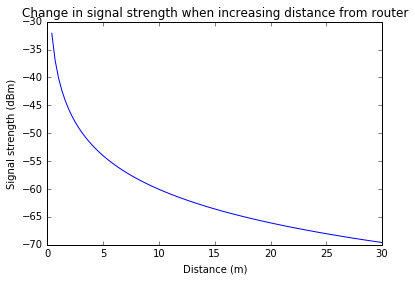

In [76]:
rs = np.linspace(0.4, 30, 100)
plt.plot(rs, get_transmission_power(0, rs))
plt.title("Change in signal strength when increasing distance from router")
plt.xlabel("Distance (m)")
plt.ylabel("Signal strength (dBm)")
plt.show()

## b)

$ P_r = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) $

$ r = \frac{c}{4\pi f} 10^{-\frac{P_r - P_t}{20}} $

## c)

In [77]:
print("Distance between -30 and -31 dBm is %f m" % (get_distance(0, -31) - get_distance(0, -30)))
print("Distance between -60 and -61 dBm is %f m" % (get_distance(0, -61) - get_distance(0, -60)))

Distance between -30 and -31 dBm is 0.038355 m
Distance between -60 and -61 dBm is 1.212900 m


## d)

This is because the signal strength from a point source decays as $r^{-2}$.

# 0.3 Position reconstruction

## e)

<img src="exampleA.png">

The red marked area is where the actual device should be according to these circles. There would be a router at the center of each of these circles.

## f)

$ P_r = P_t + 20 \times ^{10}\log\left( \frac{c}{4 \pi f r} \right)$

$ P_r = P_t + 20 \times ^{10}\log\left( \frac{c}{4 \pi f} \right) - 20 \times ^{10}\log\left( r \right)$

$r = ((x - x_i)^2 + (y - y_i)^2 + Z^2)^{\frac{1}{2}}$

$P(x ,y) = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f}\right) - \frac{1}{2} \times 20 \times ^{10}\log ((x - x_i)^2 + (y - y_i)^2 + Z^2)$

$P(x ,y) = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f}\right) - 10 \times ^{10}\log ((x - x_i)^2 + (y - y_i)^2 + Z^2)$

## g)

Mean is 0.0168 and std is 1.0458


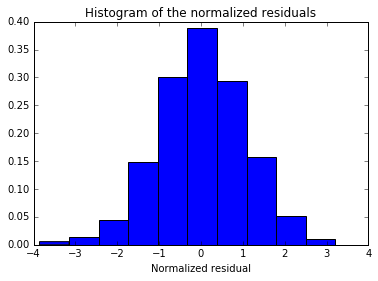

In [78]:
Pt = np.zeros(1000)
r = (20**2 + 2**2) ** 0.5 
Pr = get_transmission_power(Pt, r) + np.random.randn(1000)

normalized_residual = get_transmission_power(Pt, r) - Pr
plt.hist(normalized_residual, normed=True)
plt.title("Histogram of the normalized residuals")
plt.xlabel("Normalized residual")

mean = np.mean(normalized_residual)
std = np.std(normalized_residual)

print("Mean is %.4f and std is %.4f" % (mean, std))

## h)

Mean is -0.0177 and std is 2.0129


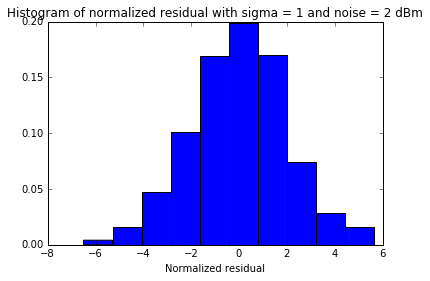

In [79]:
Pt = np.zeros(1000)
r = r = (20**2 + 2**2) ** 0.5
Pr = get_transmission_power(Pt, r) + np.random.normal(0, 2, 1000)

normalized_residual = get_transmission_power(Pt, r) - Pr
plt.hist(normalized_residual, normed=True)
plt.title("Histogram of normalized residual with sigma = 1 and noise = 2 dBm")
plt.xlabel("Normalized residual")

mean = np.mean(normalized_residual)
std = np.std(normalized_residual)

print("Mean is %.4f and std is %.4f" % (mean, std))

The standard deviation will be too big, or too small respectively.

## i)

Mean is 14.0479 and std is 0.9945


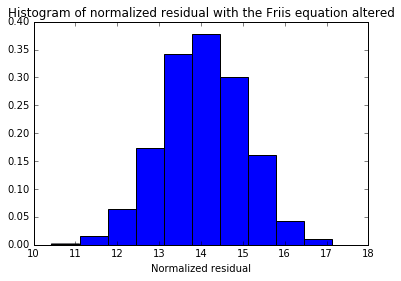

In [80]:
Pt = np.zeros(1000)
r = (20*2 + 2**2) ** 0.5 
Pr = Pt + 25 * np.log10(c / (4 * pi * f * r)) + np.random.normal(0, 1, 1000)

normalized_residual = get_transmission_power(Pt, r) - Pr
plt.hist(normalized_residual, normed=True)
plt.title("Histogram of normalized residual with the Friis equation altered")
plt.xlabel("Normalized residual")

mean = np.mean(normalized_residual)
std = np.std(normalized_residual)

print("Mean is %.4f and std is %.4f" % (mean, std))

The mean has shifted.

## j)

You want to see the mean around 0, indicating no systematic error. And the standard deviation as 1, to indicate that your estimate of sigma was correct.

# 0.4 Toy Monte Carlo

## k)

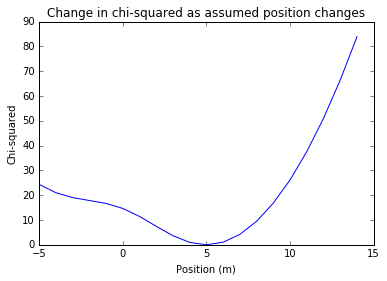

In [81]:
routers = [(0, 0, 3), (0, 20, 3), (20, 0, 3), (20, 20, 3)]
device_position = (5, 5, 1)
Pt = 0

chi_squareds = []
for x in range(-5, 15):
    estimated_position = [x, 5, 1]
    total = 0
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position)
        Pr = get_transmission_power_coords(Pt, router, estimated_position)
        total += (Si - Pr) ** 2
    chi_squareds.append(total)

plt.plot(np.arange(-5, 15), chi_squareds)
plt.title("Change in chi-squared as assumed position changes")
plt.ylabel("Chi-squared")
plt.xlabel("Position (m)")
plt.show()

## l)

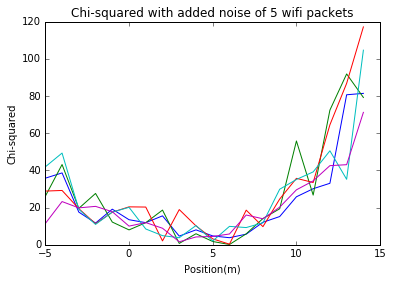

In [82]:
for i in range(5):
    chi_squareds = []
    for x in range(-5, 15):
        estimated_position = [x, 5, 1]
        total = 0
        for router in routers:
            Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
            Pr = get_transmission_power_coords(Pt, router, estimated_position)
            total += (Si - Pr) ** 2
        chi_squareds.append(total)

    plt.plot(np.arange(-5, 15), chi_squareds)

plt.title("Chi-squared with added noise of 5 wifi packets")
plt.xlabel("Position(m)")
plt.ylabel("Chi-squared")
plt.show()

## m)

In [83]:
def get_chi_squared(pos_est):
    estimated_position = [pos_est[0], pos_est[1], 1]
    total = 0
    for i, router in enumerate(routers):
        Si = S[i]
        Pr = get_transmission_power_coords(Pt, router, estimated_position)
        total += (Si - Pr) ** 2
    return total


S = []
for router in routers:
    Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
    S.append(Si)
x0 = np.array([10.0, 10.0])
# check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
# print(check_grad_result)
result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
print("Using scipy minimize, we find the minimum of chi-squared.")
print('Minimum of x is %f, and y is %f' % (result['x'][0], result['x'][1]))

Using scipy minimize, we find the minimum of chi-squared.
Minimum of x is 5.342701, and y is 5.237551


## n) and o)

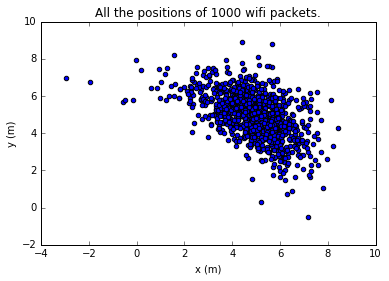

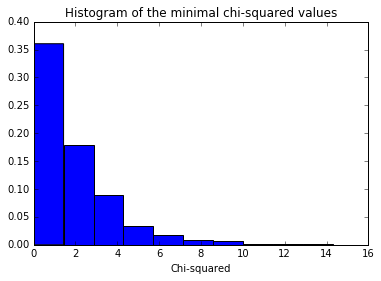

Mean of (x,y): (4.86,4.95), mean of chi squared: 1.96
So the mean of chi squared agrees with 2 degrees of freedom.


In [84]:
positions = []
Xs = []
for i in range(1000):
    S = []
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
        S.append(Si)
    x0 = np.array([10.0, 10.0])
    # check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
    # print(check_grad_result)
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))

positions = np.array(positions)
Xs = np.array(Xs)

plt.clf()
plt.scatter(positions[:, 0], positions[:, 1])
plt.title("All the positions of 1000 wifi packets.")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

plt.clf()
plt.hist(Xs, normed=True)
plt.title("Histogram of the minimal chi-squared values")
plt.xlabel("Chi-squared")
plt.show()

mean_pos = positions.mean(axis=0)
mean_chi_square = Xs.mean()
print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f" % (mean_pos[0], mean_pos[1], mean_chi_square))
print("So the mean of chi squared agrees with 2 degrees of freedom.")

## p)

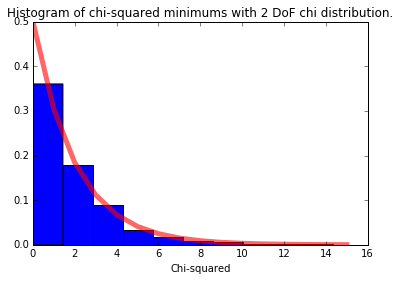

The histogram and the distribution agree.


In [85]:
df = 2
plt.plot(chi2.pdf(np.arange(16), df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(Xs, normed=True)
plt.title("Histogram of chi-squared minimums with 2 DoF chi distribution.")
plt.xlabel("Chi-squared")
plt.show()
print("The histogram and the distribution agree.")

## q)

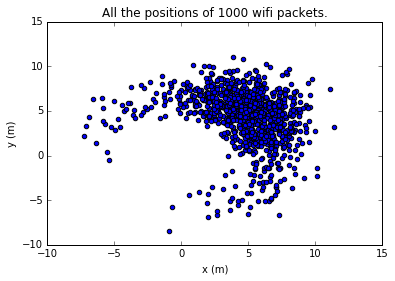

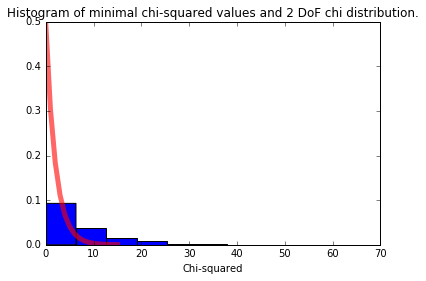

Mean of (x,y): (4.61,4.36), mean of chi squared: 7.12


In [86]:
positions = []
Xs = []
for i in range(1000):
    S = []
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 2)
        S.append(Si)
    x0 = np.array([10.0, 10.0])
    # check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
    # print(check_grad_result)
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))

positions = np.array(positions)
Xs = np.array(Xs)


plt.clf()
plt.scatter(positions[:, 0], positions[:, 1])
plt.title("All the positions of 1000 wifi packets.")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

plt.clf()
df = 2
plt.plot(chi2.pdf(np.arange(16), df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(Xs, normed=True)
plt.title("Histogram of minimal chi-squared values and 2 DoF chi distribution.")
plt.xlabel("Chi-squared")
plt.show()

mean_pos = positions.mean(axis=0)
mean_chi_square = Xs.mean()
print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f" % (mean_pos[0], mean_pos[1], mean_chi_square))

The average of the minized positions is still close to (5, 5), but the spread is much bigger. The chi-squared mean also doesn't equal the 2 degrees of freedom anymore, meaning the histogram doesn't follow the correct chi-squared curve anymore either.

## r)

It means we underestimated the error by a factor 2.

# 0.5 Error on fit parameters

## s)

$\chi^2 = \sum_i \frac{S_i^2 - 2S_i P(x_0,y_0) - 2S_i \frac{\partial P(x_0,y_0)}{\partial x}(x-x_0) - 2S_i \frac{\partial P(x_0,y_0)}{\partial y}(y-y_0) + P(x_0, y_0)^2 + 2P(x_0, y_0)\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0) + 2P(x_0, y_0)\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0) + (\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0))^2 + 2 \frac{\partial P(x_0,y_0)}{\partial x}(x-x_0)\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0) + (\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0))^2}{\sigma_i^2}$

## t)

$ \chi^2 = \sum_i \frac{S_i^2 - 2S_i P(x_0,y_0) + P(x_0,y_0)^2 + (\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0))^2 + (\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0))^2 + 2 \frac{\partial P(x_0,y_0)}{\partial x}(x-x_0)\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0)}  {\sigma_i^2}$

## u)

$A = S_i^2 - 2S_i P(x_0,y_0) + P(x_0,y_0)^2 $

$B_{11} = \left(\frac{\partial P(x_0,y_0)}{\partial x}\right)^2 $
$B_{12} = \frac{\partial P(x_0,y_0)}{\partial x}\frac{\partial P(x_0,y_0)}{\partial y} $

$B_{21} = \frac{\partial P(x_0,y_0)}{\partial x}\frac{\partial P(x_0,y_0)}{\partial y} $
$B_{22} = \left(\frac{\partial P(x_0,y_0)}{\partial y}\right)^2 $

## v)

We have to solve the equation

$ \chi^2(0, \Delta y) + 1 = \chi^2(\Delta x, \Delta y)$.

Which we solve for $\Delta x$ to find how much it has to change for $\chi^2$ to change by 1. The value of $\Delta x$ will be maximum when $\Delta y = 0$. Solving this results in:

$ \Delta x^2 = \left( \frac{\partial P}{\partial x} \right)^{-2}$

Likewise for $\Delta y$:

$\Delta y^2 = \left( \frac{\partial P}{\partial y} \right)^{-2}$

## w)

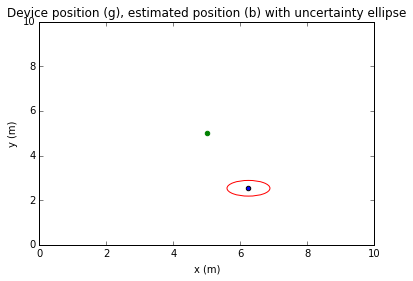

Estimate (x,y): (6.24,2.53), chi squared: 1.72
Variance around this position is (1.6454, 0.4933)
And the standard deviation is (1.2827, 0.7024)


In [87]:
S = []

for router in routers:
    Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
    S.append(Si)

x0 = np.array([10.0, 10.0])
result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
(x, y) = result.x
Xs = (get_chi_squared(result.x))

x_variance = 0
y_variance = 0
for router in routers:
    x_variance += (-20.0 * (x - router[0]) / (
        np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2
    y_variance += (-20.0 * (y - router[1]) / (
        np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2

plt.clf()
ax = plt.subplot()
plt.scatter(device_position[0], device_position[1], color='g')
plt.scatter(x, y)
ell = Ellipse(xy=(x, y),
              width=x_variance ** 0.5, height=y_variance ** 0.5,
              angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.title("Device position (g), estimated position (b) with uncertainty ellipse")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

print("Estimate (x,y): (%.2f,%.2f), chi squared: %.2f" % (x, y, Xs))
print("Variance around this position is (%.4f, %.4f)" % (x_variance, y_variance))
print("And the standard deviation is (%.4f, %.4f)" % (x_variance ** 0.5, y_variance ** 0.5))

## y)

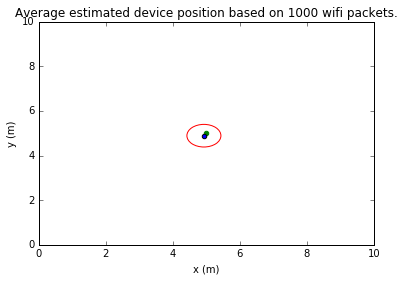

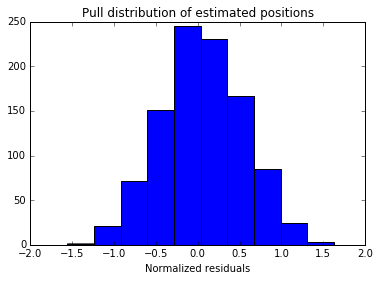

Mean of (x,y): (4.93,4.89), mean of chi squared: 2.07, mean of standard deviations: (1.02, 1.01)
Mean of normalized residuals: 0.0568, standard deviation: 0.4895
The standard deviation is lower because we're using multiple routers to estimate the final position. Thus the error of each router gets averaged away.


In [88]:
positions = []
Xs = []
variances = []
normalized_residuals = []

for i in range(1000):
    S = []

    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
        S.append(Si)
    
    x0 = np.array([10.0, 10.0])
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    (x, y) = result.x
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))

    x_variance = 0
    y_variance = 0
    for router in routers:
        x_variance += (-20.0 * (x - router[0]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2
        y_variance += (-20.0 * (y - router[1]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2

    variances.append((x_variance, y_variance))

    normalized_residual = 0
    for i, router in enumerate(routers):
        normalized_residual += S[i] - get_transmission_power_coords(Pt, router, (x, y, device_position[2]))

    normalized_residual /= len(routers)
    normalized_residuals.append(normalized_residual)

positions = np.array(positions)
Xs = np.array(Xs)
variances = np.array(variances)
normalized_residuals = np.array(normalized_residuals)

mean_pos = positions.mean(axis=0)
mean_variance = variances.mean(axis=0)
mean_chi_square = Xs.mean()

plt.clf()
ax = plt.subplot()
plt.scatter(device_position[0], device_position[1], color='g')
plt.scatter(mean_pos[0], mean_pos[1])
ell = Ellipse(xy=(mean_pos[0], mean_pos[1]),
              width=mean_variance[0] ** 0.5, height=mean_variance[1] ** 0.5,
              angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.title("Average estimated device position based on 1000 wifi packets.")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

plt.clf()
plt.hist(normalized_residuals)
plt.title("Pull distribution of estimated positions")
plt.xlabel("Normalized residuals")
plt.show()

print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f, mean of standard deviations: (%.2f, %.2f)" % (
    mean_pos[0], mean_pos[1], mean_chi_square, mean_variance[0] ** 0.5, mean_variance[1] ** 0.5))
print("Mean of normalized residuals: %.4f, standard deviation: %.4f" % (
np.mean(normalized_residuals), np.std(normalized_residuals)))
print("The standard deviation is lower because we're using multiple \
routers to estimate the final position. Thus the error of each router \
gets averaged away.")

## z)

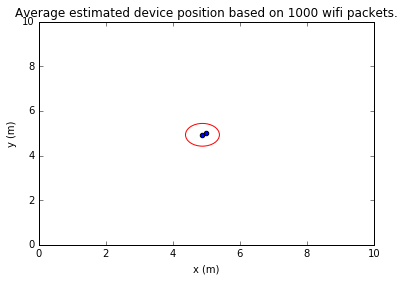

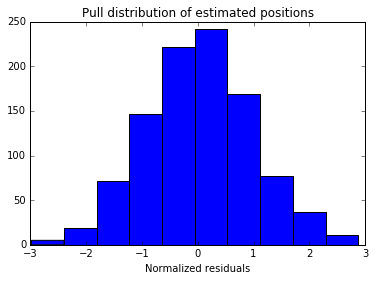

Mean of (x,y): (4.88,4.93), mean of chi squared: 1.98, mean of standard deviations: (1.01, 1.02)
Mean of normalized residuals: 0.0370, standard deviation: 0.9526
The standard deviation doubles.


In [89]:
positions = []
Xs = []
variances = []
normalized_residuals = []

for i in range(1000):
    S = []

    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
        S.append(Si)
        
    x0 = np.array([10.0, 10.0])
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    (x, y) = result.x
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))

    x_variance = 0
    y_variance = 0

    for router in routers:
        x_variance += (-20.0 * (x - router[0]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2
        y_variance += (-20.0 * (y - router[1]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2

    variances.append((x_variance, y_variance))

    normalized_residual = 0
    for i, router in enumerate(routers):
        normalized_residual += S[i] - get_transmission_power_coords(Pt, router, (x, y, device_position[2]))

    normalized_residual /= len(routers)
    normalized_residuals.append(normalized_residual)

positions = np.array(positions)
Xs = np.array(Xs)
variances = np.array(variances)
normalized_residuals = np.array(normalized_residuals) * 2

mean_pos = positions.mean(axis=0)
mean_variance = variances.mean(axis=0)
mean_chi_square = Xs.mean()

plt.clf()
ax = plt.subplot()
plt.scatter(device_position[0], device_position[1])
plt.scatter(mean_pos[0], mean_pos[1])
ell = Ellipse(xy=(mean_pos[0], mean_pos[1]),
              width=mean_variance[0] ** 0.5, height=mean_variance[1] ** 0.5,
              angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.title("Average estimated device position based on 1000 wifi packets.")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

plt.clf()
plt.hist(normalized_residuals)
plt.title("Pull distribution of estimated positions")
plt.xlabel("Normalized residuals")
plt.show()

print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f, mean of standard deviations: (%.2f, %.2f)" % (
    mean_pos[0], mean_pos[1], mean_chi_square, mean_variance[0] ** 0.5, mean_variance[1] ** 0.5))
print("Mean of normalized residuals: %.4f, standard deviation: %.4f" % (
    np.mean(normalized_residuals), np.std(normalized_residuals)))
print("The standard deviation doubles.")

# 0.6 Wifi Tracking

## a)

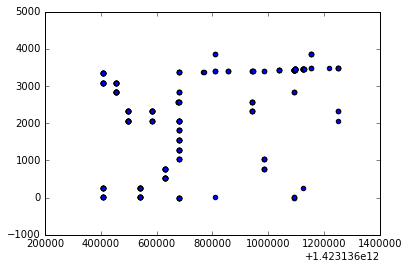

There are 28 packet groups identified.


In [90]:
import pandas as pd
from collections import defaultdict

min_router_count = 4
routers = {"Lima": (5.82, 5.48, 3.0), "Mike": (11.33, 9.43, 3.0), "Kilo": (12.39, 6.77, 3.0),
           "Oscar": (2.48, 7.36, 3.0), "Alpha": (8.53, 2.16, 3.0), "India": (5.82, 5.48, 3.0),
           "November": (8.34, 4.13, 3.0), "Hotel": (5.43, 4.71, 3.0), "Romeo": (10.99, 5.94, 3.0),
           "Quebec": (6.82, 9.78, 3.0), "Papa": (9.9, 10.39, 3.0)}
device_height = 1.0

dataset = pd.read_csv("UvA-wifitracking-exercise-prepped-data.csv")
dataset = pd.DataFrame.sort_values(dataset, "measurementTimestamp")
# print(dataset["measurementTimestamp"])
plt.clf()
plt.scatter(dataset["measurementTimestamp"], dataset["seqNr"])
plt.show()

time_groups = defaultdict(list)
packet_groups = {}
for new_packet in dataset.iterrows():
    new_packet = new_packet[1]
    time_groups[new_packet["seqNr"]].append(new_packet["measurementTimestamp"])
    for packets in packet_groups.values():
        existing_packet = packets[-1]
        if new_packet["seqNr"] == existing_packet["seqNr"] and new_packet["typeNr"] == existing_packet["typeNr"] and \
                        new_packet["subTypeNr"] == existing_packet["subTypeNr"] and existing_packet[
            "retryFlag"] == 0 and abs(
                    new_packet["measurementTimestamp"] - existing_packet["measurementTimestamp"]) < 500:
            packets.append(new_packet)
            break
    else:
        packet_groups[new_packet["measurementTimestamp"]] = [new_packet]

new_packet_groups = {}
for packet_time in packet_groups.keys():
    packets = packet_groups[packet_time]
    if len(packets) >= min_router_count:
        new_packet_groups[packet_time] = packet_groups[packet_time]
packet_groups = new_packet_groups
print("There are %d packet groups identified." % len(packet_groups))

## b) to f)

Mean routers per packet: 7.571
Mean chi2: 6.602, mean Pt: -19.835, mean position: (7.337,4.479)


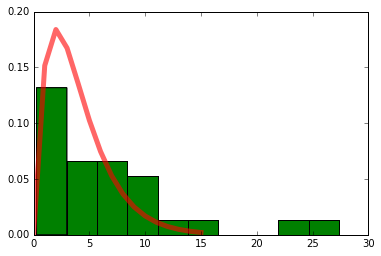

System resolution: (3.106, 3.193)


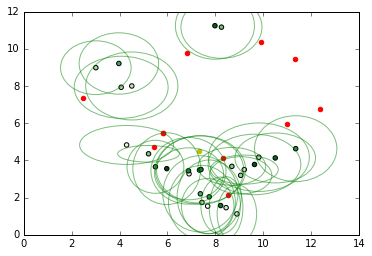

In [91]:
def get_chi_squared(inputs, S, sigma):
    Pt, x_est, y_est = inputs
    estimated_position = [x_est, y_est, device_height]
    total = 0
    for router_name in S.keys():
        Si = S[router_name]
        Pr = get_transmission_power_coords(Pt, routers[router_name], estimated_position)
        total += (Si - Pr) ** 2 / sigma / sigma
    return total


results = []
chi2s = []
num_routers = []
variances = []
normalized_residuals = []
for i, packets in enumerate(list(packet_groups.values())):
    S = {}
    sigma = 7.0
    num_routers.append(len(packets))
    for packet in packets:
        S[packet["droneId"]] = packet["signal"]

    x0 = np.array([-20.0, 5.0, 5.0])
    result = minimize(get_chi_squared, x0, args=(S, sigma), method="L-BFGS-B", jac=False, options={'maxiter': 100000})
    current_chi2 = get_chi_squared(result.x, S, sigma)

    Pt, x, y = result.x[0], result.x[1], result.x[2]
    x_variance = 0
    y_variance = 0
    for router_name in S:
        router = routers[router_name]
        x_variance += (-20.0 * (x - router[0]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_height - router[2]) ** 2))) ** 2
        y_variance += (-20.0 * (y - router[1]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_height - router[2]) ** 2))) ** 2

    variances.append((x_variance, y_variance))

    normalized_residual = 0
    for router_name in S:
        normalized_residual += S[router_name] - get_transmission_power_coords(Pt, routers[router_name],
                                                                              (x, y, device_height))
    normalized_residual /= len(routers)
    normalized_residuals.append(normalized_residual)

    chi2s.append(current_chi2)
    results.append(result.x)

    
chi2s = np.array(chi2s)
results = np.array(results)
num_routers = np.array(num_routers)
variances = np.array(variances)
normalized_residuals = np.array(normalized_residuals)

mean_routers = np.mean(num_routers)
print("Mean routers per packet: %.3f" % mean_routers)

mean_chi2s = np.mean(chi2s)
mean_results = np.mean(results, axis=0)
print("Mean chi2: %.3f, mean Pt: %.3f, mean position: (%.3f,%.3f)" %
      (mean_chi2s, mean_results[0], mean_results[1], mean_results[2]))

router_positions = []
for router_position in routers.values():
    router_positions.append(router_position)
router_positions = np.array(router_positions)

plt.clf()
plt.hist(chi2s, normed=True)
df = np.ceil(mean_routers - 4)
plt.plot(chi2.pdf(np.arange(16), df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(chi2s, normed=True)
plt.show()

mean_pos = mean_results[1:]
mean_variance = variances.mean(axis=0)
print("System resolution: (%.3f, %.3f)" % (mean_variance[0] ** 0.5, mean_variance[1] ** 0.5))

plt.clf()
ax = plt.subplot()

cm = plt.cm.get_cmap('Greens')
plt.scatter(results[:, 1], results[:, 2], c=np.arange(len(results)), cmap=cm)
plt.scatter(mean_pos[0], mean_pos[1], color="y")
plt.scatter(router_positions[:, 0], router_positions[:, 1], color="r")
for i in range(len(results)):
    ell = Ellipse(xy=(results[i, 1], results[i, 2]),
                  width=variances[i, 0] ** 0.5, height=variances[i, 1] ** 0.5,
                  angle=0, color='g')
    ell.set_alpha(0.5)
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.show()

## g)
We used a gaussian over the timestamps corresponding to their weights on current position estimation.

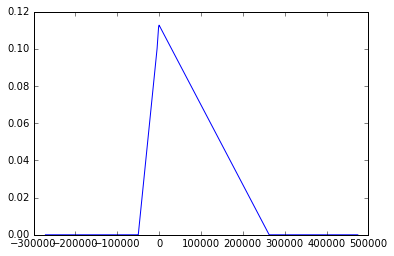

Mean routers per packet: 7.571
Mean chi2: 7.462, mean Pt: -20.069, mean position: (7.246,4.223)


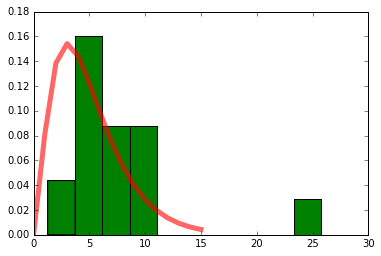

System resolution: (3.005, 3.355)


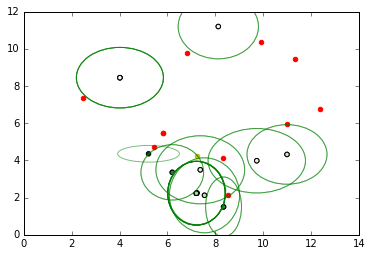

In [92]:
from scipy.stats import norm


show_weights_plot = True
time_std = 10000


def get_chi_squared_in_timeframe(inputs, all_received, current_time, sigma):
    global show_weights_plot

    time_list = sorted(list(all_received.keys()))
    weights = norm.pdf(time_list, current_time, time_std)
    weights /= sum(weights)

    if current_time == 1423136679513 and show_weights_plot:
        plt.clf()
        plt.plot(np.array(time_list) - 1423136679513, weights)
        plt.show()
        show_weights_plot = False


    chi_squared = 0
    for i, time in enumerate(time_list):
        chi_squared += weights[i] * get_chi_squared(inputs, all_received[time], sigma)

    return chi_squared

results = []
chi2s = []
num_routers = []
variances = []
normalized_residuals = []
all_received = {}
time_list = np.array(sorted(list(packet_groups.keys())))
for i, time in enumerate(time_list):
    packets = packet_groups[time]
    S = {}
    num_routers.append(len(packets))
    for packet in packets:
        S[packet["droneId"]] = packet["signal"]
    all_received[time] = S

for i, time in enumerate(time_list):
    x0 = np.array([-20.0, 5.0, 5.0])

    sigma = 7.0
    result = minimize(get_chi_squared_in_timeframe, x0, args=(all_received, time, sigma), method="L-BFGS-B", jac=False,
                      options={'maxiter': 100000})
    current_chi2 = result.fun

    Pt, x, y = result.x[0], result.x[1], result.x[2]
    x_variance = 0
    y_variance = 0
    time_list = sorted(list(all_received.keys()))
    weights = norm.pdf(time_list, time, time_std)
    weights /= sum(weights)
    for j, time in enumerate(time_list):
        for router_name in all_received[time]:
            router = routers[router_name]
            x_variance += weights[j] * (-20.0 * (x - router[0]) / (
                np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_height - router[2]) ** 2))) ** 2
            y_variance += weights[j] * (-20.0 * (y - router[1]) / (
                np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_height - router[2]) ** 2))) ** 2

    variances.append((x_variance, y_variance))

    normalized_residual = 0
    for router_name in S:
        normalized_residual += S[router_name] - get_transmission_power_coords(Pt, routers[router_name],
                                                                              (x, y, device_height))
    normalized_residual /= len(routers)
    normalized_residuals.append(normalized_residual)

    chi2s.append(current_chi2)
    results.append(result.x)

chi2s = np.array(chi2s)
results = np.array(results)
num_routers = np.array(num_routers)
variances = np.array(variances)
normalized_residuals = np.array(normalized_residuals)

mean_routers = np.mean(num_routers)
print("Mean routers per packet: %.3f" % mean_routers)

mean_chi2s = np.mean(chi2s)
mean_results = np.mean(results, axis=0)
print("Mean chi2: %.3f, mean Pt: %.3f, mean position: (%.3f,%.3f)" %
      (mean_chi2s, mean_results[0], mean_results[1], mean_results[2]))

router_positions = []
for router_position in routers.values():
    router_positions.append(router_position)
router_positions = np.array(router_positions)

plt.clf()
plt.scatter(results[:, 1], results[:, 2])
plt.scatter(router_positions[:, 0], router_positions[:, 1], color="r")
# plt.show()

plt.clf()
plt.hist(chi2s, normed=True)
df = np.ceil(mean_routers - 3)
plt.plot(chi2.pdf(np.arange(16), df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(chi2s, normed=True)
plt.show()

mean_pos = mean_results[1:]
mean_variance = variances.mean(axis=0)
print("System resolution: (%.3f, %.3f)" % (mean_variance[0] ** 0.5, mean_variance[1] ** 0.5))

plt.clf()
ax = plt.subplot()

cm = plt.cm.get_cmap('Greens')
plt.scatter(results[:, 1], results[:, 2], c=time_list, cmap=cm)
plt.scatter(mean_pos[0], mean_pos[1], color="y")
plt.scatter(router_positions[:, 0], router_positions[:, 1], color="r")
for i in range(len(results)):
    ell = Ellipse(xy=(results[i, 1], results[i, 2]),
                  width=variances[i, 0] ** 0.5, height=variances[i, 1] ** 0.5,
                  angle=0, color='g')
    ell.set_alpha(0.5)
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.show()